In [1]:
import pandas as pd
import numpy as np
import healpy as hp
import h5py
import matplotlib.pyplot as plt
import yaml
import fitsio as fio
import numba as nb
from numba import jit

import copy

from collections import OrderedDict

import xpipe.tools.catalogs as catalogs
import xpipe.paths as paths
import xpipe.xhandle.parbins as parbins
import xpipe.xhandle.xwrap as xwrap
import xpipe.tools.selector as selector
import xpipe.xhandle.shearops as shearops
import matplotlib as mpl
# from matplotlib import rc
mpl.rc('font',**{'family':'serif','serif':['serif']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
# mpl.rcParams['figure.dpi'] = 300

# mpl.rcParams["font.family"] = "serif"
# mpl.rcParams["mathtext.fontset"] = "dejavuserif"
import astropy.constants as constants
import astropy.units as u
import astropy.cosmology as cosmology

import scipy.interpolate as interp

cosmo = cosmology.FlatLambdaCDM(Om0=0.3, H0=70)

from importlib import reload
%config InlineBackend.figure_format = 'svg'
import pickle

import xpipe.tools.y3_sompz as sompz

import xpipe.tools.selector as sl
import xpipe.tools.visual as visual
import xpipe.xhandle.pzboost as pzboost

import sklearn
import sklearn.covariance
import sklearn.neighbors
import sklearn.decomposition
import scipy.stats as stats

import NFW
import scipy.optimize as optimize
import emcee
from cluster_toolkit import deltasigma

from cluster_toolkit import xi
from cluster_toolkit import bias


from classy import Class
from multiprocessing import Pool

import corner
import xpipe.tools.mass as mass

import scipy.ndimage as ndimage
import xpipe.tools.visual as visual

paths.update_params("/home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb_meta.yml")

reading DEFAULTS from default_params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3rm-stack_meta.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb_meta.yml

***********************

running in full mode

***********************



In [2]:
tmp = np.loadtxt("DESY3_CMASS.dat")[:, (0, 1, 6, 7)]
cmass = pd.DataFrame(data=tmp, columns=("RA", "DEC", "WSYS", "Z"))

oname = "/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/lenscat/LWB_DESY3_CMASS.fits"
tmp = cmass.to_records()
tmp["index"] = tmp["index"] + 1e6
# fio.write(oname, cmass.to_records())

In [3]:
tmp = np.loadtxt("DESY3_LOWZ.dat")[:, (0, 1, 6, 7)]
lowz = pd.DataFrame(data=tmp, columns=("RA", "DEC", "WSYS", "Z"))

oname = "/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/lenscat/LWB_DESY3_LOWZ.fits"
# fio.write(oname, lowz.to_records())

In [4]:
# tmp = cmass.to_records()

allgal = pd.concat((lowz, cmass), ignore_index=True)

oname = "/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/lenscat/LWB_DESY3_ALL.fits"
# fio.write(oname, allgal.to_records())

In [5]:
weights = pd.DataFrame()
weights["ww"] = allgal["WSYS"]
weights["id"] = np.arange(len(allgal))

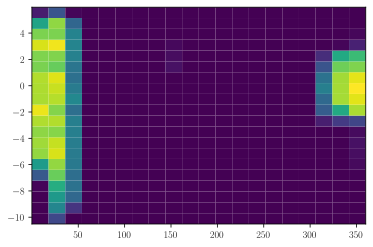

In [16]:
plt.hist2d(cmass["RA"], cmass["DEC"], bins=20)
None

# Reading results

## Automated profiles

In [6]:
main_file_path = "/e/ocean1/users/vargatn/DESY3/Y3_mastercat_03_31_20.h5"
src = sompz.sompz_reader(main_file_path)
src.build_lookup()

In [7]:
flist, flist_jk, rlist, rlist_jk = parbins.get_file_lists(paths.params, paths.dirpaths)

In [ ]:
ACP_rands = shearops.AutoCalibrateProfile([rlist[0],], rlist_jk[0], src, xlims=(0.01, 30), sbins=(2, 3))

In [8]:
ACP = shearops.AutoCalibrateProfile([flist[0],], flist_jk[0], src, xlims=(0.01, 30), sbins=(2, 3))

In [9]:
ACP.get_profiles(ismeta=False, id_key="index", z_key="Z")

loading source bin 2
loading source bin 3


In [102]:
# random_corrected_profile = ACP.profile.composite(ACP_rand.profile, operation="-")

In [98]:
ACP._profiles.rr

In [101]:
ACP._profiles[1].dst


array([0.03189386, 0.02350096, 0.01230654, 0.00991342, 0.00504066,
       0.00330317, 0.00181455, 0.00090489, 0.00049367, 0.00026496])

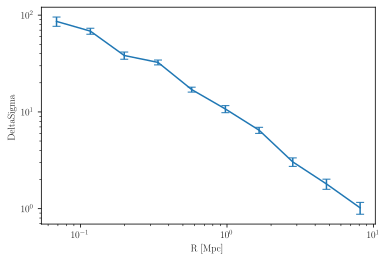

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.errorbar(ACP.rr, ACP.dst, yerr=ACP.dst_err, capsize=4)
# ax.set_title("src bin 2")
# for i in np.arange(4):
#     ax.plot(ACP.rr, boost_profiles[i][0][0], label="zbin"+str(i))
ax.set_xlabel("R [Mpc]")
ax.set_ylabel("DeltaSigma")
# ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")

In [51]:
for i in np.arange(4):
    smb = pzboost.SOMBoost(src, [flist_jk[i],])
    smb.get_pair_datas(pair_outpath="lwb-y3-lowz+cmass_v01_y1clust_qbin-"+str(i)+"_pairs.h5")

0 2
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 2 16
0 2 17
0 2 18
0 2 19
0 2 20
0 2 21
0 2 22
0 2 23
0 2 24
0 2 25
0 2 26
0 2 27
0 2 28
0 2 29
0 2 30
0 2 31
0 2 32
0 2 33
0 2 34
0 2 35
0 2 36
0 2 37
0 2 38
0 2 39
0 2 40
0 2 41
0 2 42
0 2 43
0 2 44
0 2 45
0 2 46
0 2 47
0 2 48
0 2 49
0 2 50
0 2 51
0 2 52
0 2 53
0 2 54
0 2 55
0 2 56
0 2 57
0 2 58
0 2 59
0 2 60
0 2 61
0 2 62
0 2 63
0 2 64
0 2 65
0 2 66
0 2 67
0 2 68
0 2 69
0 2 70
0 2 71
0 2 72
0 2 73
0 2 74
0 2 75
0 2 76
0 2 77
0 2 78
0 2 79
0 2 80
0 2 81
0 2 82
0 2 83
0 2 84
0 2 85
0 2 86
0 2 87
0 2 88
0 2 89
0 2 90
0 2 91
0 2 92
0 2 93
0 2 94
0 2 95
0 2 96
0 2 97
0 2 98
0 2 99
merged catalogs
0 3
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
0 3 10
0 3 11
0 3 12
0 3 13
0 3 14
0 3 15
0 3 16
0 3 17
0 3 18
0 3 19
0 3 20
0 3 21
0 3 22
0 3 23
0 3 24
0 3 25
0 3 26
0 3 27
0 3 28
0 3 29
0 3 30
0 3 31
0 3 32
0 3 33
0 3 34
0 3 35
0 3 36
0 3 37
0 3 38
0 3 39
0 3 40
0 3 41
0 

In [18]:
tab = pickle.load(open("lwb-y3-lowz+cmass_v01_y1clust_qbin-"+str(i)+"_pairs.h5", "rb"))

In [27]:
reload(pzboost)

<module 'xpipe.xhandle.pzboost' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/pzboost.py'>

In [53]:
boost_profiles = []
smbs = []
for i in np.arange(4):
    print(i)
    smb = pzboost.SOMBoost(src, [flist_jk[i],], pairs_to_load="lwb-y3-lowz+cmass_v01_y1clust_qbin-"+str(i)+"_pairs.h5")
    smb.prep_boost(bins_to_use=np.arange(10))
    smb.get_boost()
    smbs.append(smb)
    boost_profiles.append(smb.boost_amps)
    

0
0 0


/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:453: RuntimeWarning: underflow encountered in nextafter
  x_new[lower_mask] = np.nextafter(lb[lower_mask], ub[lower_mask])
/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/pzboost.py:975: RuntimeWarning: underflow encountered in multiply
  self.mixarr[i, :] = amps[i] * garr + (1. - amps[i]) * self.refpdf
/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/trf.py:263: RuntimeWarning: underflow encountered in multiply
  g_norm = norm(g * v, ord=np.inf)
/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/trf.py:333: RuntimeWarning: underflow encountered in multiply
  p = d * p_h  # Trust-region solution in the original space.
/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/trf.py:142: RuntimeWarning: underflow encountered in multiply
  p *= p_stride
/home/moon/vargatn/anaconda3/e

0 1
1
0 0
0 1
2
0 0
0 1
3
0 0
0 1


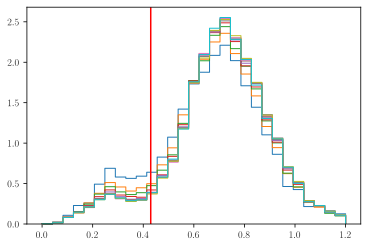

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
bins = np.linspace(0, 1.2, 30)

for i in np.arange(10):
    ax.hist(smb.zvals[0][0][i], weights=smb.wws[0][0][i], bins=bins, histtype="step", density=True)
ax.axvline(smb.boost_means[0][0], color="red")
# ax.axvline(smb.boost_means[0][0], color="red")
# ax.axvline(smb.boost_means[0][0], color="red")

In [54]:
boost_profiles[0]

[[array([1.53803198e-001, 7.95450258e-002, 4.55023982e-002, 2.31352633e-002,
         9.12932697e-003, 1.24528740e-003, 1.36042053e-038, 8.37050650e-004,
         4.86679441e-209, 6.93104397e-006]),
  array([1.16513383e-01, 6.27769693e-02, 4.10265279e-02, 2.26383126e-02,
         1.09789976e-02, 5.25432002e-03, 7.87813917e-04, 4.15981397e-40,
         5.68801028e-17, 2.27648819e-06])]]

In [58]:
boost_profiles[0][0]

[array([1.53803198e-001, 7.95450258e-002, 4.55023982e-002, 2.31352633e-002,
        9.12932697e-003, 1.24528740e-003, 1.36042053e-038, 8.37050650e-004,
        4.86679441e-209, 6.93104397e-006]),
 array([1.16513383e-01, 6.27769693e-02, 4.10265279e-02, 2.26383126e-02,
        1.09789976e-02, 5.25432002e-03, 7.87813917e-04, 4.15981397e-40,
        5.68801028e-17, 2.27648819e-06])]

In [60]:
boost_profiles[i][0][0]

array([1.53803198e-001, 7.95450258e-002, 4.55023982e-002, 2.31352633e-002,
       9.12932697e-003, 1.24528740e-003, 1.36042053e-038, 8.37050650e-004,
       4.86679441e-209, 6.93104397e-006])

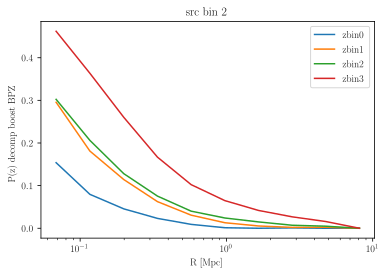

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("src bin 2")
for i in np.arange(4):
    ax.plot(ACP.rr, boost_profiles[i][0][0], label="zbin"+str(i))
ax.set_xlabel("R [Mpc]")
ax.set_ylabel("P(z) decomp boost BPZ")
ax.legend()
ax.set_xscale("log")
fig.savefig("pz_boost_lwb_src-bin-2.png", dpi=300, bbox_inches="tight")

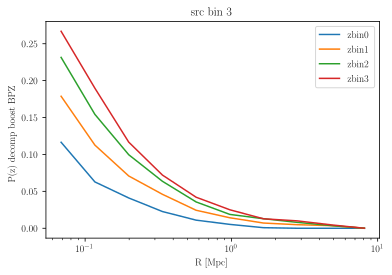

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("src bin 3")
for i in np.arange(4):
    ax.plot(ACP.rr, boost_profiles[i][0][1], label="zbin"+str(i))
ax.set_xlabel("R [Mpc]")
ax.set_ylabel("P(z) decomp boost BPZ")
ax.legend()
ax.set_xscale("log")
fig.savefig("pz_boost_lwb_src-bin-3.png", dpi=300, bbox_inches="tight")

In [90]:
arr = np.array(boost_profiles)[:, 0, :, :]
prof1 = np.vstack((ACP.rr, arr[:, 0, :])).T
prof2 = np.vstack((ACP.rr, arr[:, 1, :])).T

In [95]:
fname = "pz_boost_lwb_src-bin-2.dat"
np.savetxt(fname, prof1, fmt="%.6f", header="R [Mpc]\tf_cl_z_bin_0\tf_cl_z_bin_1\tf_cl_z_bin_2\tf_cl_z_bin_3")

In [96]:
fname = "pz_boost_lwb_src-bin-3.dat"
np.savetxt(fname, prof2, fmt="%.6f", header="R [Mpc]\tf_cl_z_bin_0\tf_cl_z_bin_1\tf_cl_z_bin_2\tf_cl_z_bin_3")

In [12]:
len(smb.zvals[0][0])

11

In [19]:
flist, flist_jk, rlist, rlist_jk = parbins.get_file_lists(paths.params, paths.dirpaths)
# for i, clust_name in enumerate(flist_jk):
i = 0
profiles = []
for clust_name in flist_jk:
    _profiles = []
    for sbin in (1, 2, 3):
#         clust_name = flist_jk[i]
        print("processing source bin", sbin)
        clust_infos = xwrap.create_infodict(clust_name)
        clust_files = [info["outfile"].replace("_result.dat", "_bin" + str(sbin + 1) + "_result.dat") for info in clust_infos]
        clust = shearops.process_profile(clust_files, ismeta=False, weights=weights, shear=True)
        _profiles.append(clust)
    profiles.append(_profiles)    

processing source bin 1
processing source bin 2
processing source bin 3
processing source bin 1
processing source bin 2
processing source bin 3
processing source bin 1
processing source bin 2
processing source bin 3
processing source bin 1
processing source bin 2
processing source bin 3


In [50]:
reload(shearops)

<module 'xpipe.xhandle.shearops' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py'>

In [56]:
ACP = shearops.AutoCalibrateProfile([flist[0],], flist_jk[0], src, xlims=(0.01, 200))

In [57]:
ACP.get_profiles(ismeta=False, id_key="index", z_key="Z")

loading source bin 2
loading source bin 3


In [70]:
reload(pzboost)

<module 'xpipe.xhandle.pzboost' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/pzboost.py'>

In [72]:
for i in np.arange(4):
    smb = pzboost.SOMBoost(src, [flist_jk[i],])
    smb.get_pair_datas(pair_outpath="lwb-y3-lowz+cmass_v01_y1clust_qbin-"+str(i)+"_pairs.h5")


0 2
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 2 16
0 2 17
0 2 18
0 2 19
0 2 20
0 2 21
0 2 22
0 2 23
0 2 24
0 2 25
0 2 26
0 2 27
0 2 28
0 2 29
0 2 30
0 2 31
0 2 32
0 2 33
0 2 34
0 2 35
0 2 36
0 2 37
0 2 38
0 2 39
0 2 40
0 2 41
0 2 42
0 2 43
0 2 44
0 2 45
0 2 46
0 2 47
0 2 48
0 2 49
0 2 50
0 2 51
0 2 52
0 2 53
0 2 54
0 2 55
0 2 56
0 2 57
0 2 58
0 2 59
0 2 60
0 2 61
0 2 62
0 2 63
0 2 64
0 2 65
0 2 66
0 2 67
0 2 68
0 2 69
0 2 70
0 2 71
0 2 72
0 2 73
0 2 74
0 2 75
0 2 76
0 2 77
0 2 78
0 2 79
0 2 80
0 2 81
0 2 82
0 2 83
0 2 84
0 2 85
0 2 86
0 2 87
0 2 88
0 2 89
0 2 90
0 2 91
0 2 92
0 2 93
0 2 94
0 2 95
0 2 96
0 2 97
0 2 98
0 2 99
merged catalogs
0 3
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
0 3 10
0 3 11
0 3 12
0 3 13
0 3 14
0 3 15
0 3 16
0 3 17
0 3 18
0 3 19
0 3 20
0 3 21
0 3 22
0 3 23
0 3 24
0 3 25
0 3 26
0 3 27
0 3 28
0 3 29
0 3 30
0 3 31
0 3 32
0 3 33
0 3 34
0 3 35
0 3 36
0 3 37
0 3 38
0 3 39
0 3 40
0 3 41
0 

In [76]:
i = 0
smb = pzboost.SOMBoost(src, [flist_jk[i],], pairs_to_load="lwb-y3-lowz+cmass_v01_y1clust_qbin-"+str(i)+"_pairs.h5")
smb.prep_boost()


In [85]:
len(smb.zvals[0][0])

11

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.histogram(smb.zvals[-1], bins=bins, weights=_wws[-1], density=True)[0])

In [74]:
i = 0
smb.prep_boost(pair_outpath="lwb-y3-lowz+cmass_v01_y1clust_qbin-"+str(i)+"_pairs.h5")

0 2
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 2 16
0 2 17
0 2 18
0 2 19
0 2 20
0 2 21
0 2 22
0 2 23
0 2 24
0 2 25
0 2 26
0 2 27
0 2 28
0 2 29
0 2 30
0 2 31
0 2 32
0 2 33
0 2 34
0 2 35
0 2 36
0 2 37
0 2 38
0 2 39
0 2 40
0 2 41
0 2 42
0 2 43
0 2 44
0 2 45
0 2 46
0 2 47
0 2 48
0 2 49
0 2 50
0 2 51
0 2 52
0 2 53
0 2 54
0 2 55
0 2 56
0 2 57
0 2 58
0 2 59
0 2 60
0 2 61
0 2 62
0 2 63
0 2 64
0 2 65
0 2 66
0 2 67
0 2 68
0 2 69
0 2 70
0 2 71
0 2 72
0 2 73
0 2 74
0 2 75
0 2 76
0 2 77
0 2 78
0 2 79
0 2 80
0 2 81
0 2 82
0 2 83
0 2 84
0 2 85
0 2 86
0 2 87
0 2 88
0 2 89
0 2 90
0 2 91
0 2 92
0 2 93
0 2 94
0 2 95
0 2 96
0 2 97
0 2 98
0 2 99


KeyboardInterrupt: 

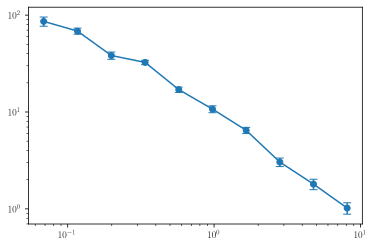

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(ACP.rr, ACP.dst, yerr=ACP.dst_err, marker="o", capsize=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_label("")